# Aula 6 - Exercícios - Storytelling e Correlação
### Consulta a internet (Google, Stackoverflow e etc) liberada!!

In [59]:
# Importe a biblioteca pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Biblioteca para plotar gráficos
import seaborn as sns # Biblioteca para plotar gráficos baseada no matplotlib
import re
from datetime import datetime
import locale

### 6.3 Analise o dataset de curetagem e argumente baseado em dados se o dado da quantidade de procedimentos de curetagem é periódico ou não.
#### Se for periódico, encontre qual o período médio do pico. Elenque possíveis causas desta periodicidade.
#### Faça suas análises em até 4 células


In [60]:
# YOUR CODE HERE
# Data source path
path_curetagem='../../curso_ciencia_dados2020/data/originais/curetagem/consolidado/curetagem2018.xlsx'

# Loading dataset from source
df_curetagem = pd.read_excel(path_curetagem, na_values='-')
df_curetagem.rename(columns={'Unidade da Federação': 'uf'}, inplace=True)
del df_curetagem['Total']

# Unpivoting the data columns
df_unpivoted = df_curetagem.melt(id_vars=['uf'], var_name='data', value_name='qtd')

locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

# Converting the date (ig.: jan/2018) to date format, so the data can be ordere chronologically
df_unpivoted['data'] = df_unpivoted['data'].apply(lambda x: datetime.strptime(x, '%Y/%b'))

# Converting the column qtd to float, so the data can be summed
df_unpivoted['qtd'] = df_unpivoted['qtd'].astype(float)

# Grouping the data by date (month) and summing the qtde, so we can know the amount of procedures per mounth
df_grouped = df_unpivoted.groupby(by="data", as_index= False)["qtd"].sum()

# Sorting data by date
df_grouped = df_grouped.sort_values(by=["data"])

# Creating a column to store mouth/year as string
df_grouped["mes_ano_label"] = df_grouped["data"].apply(lambda x: x.strftime('%b/%Y'))

## Análise dos dados dispostos no gráfico

Pela análise dos dois gráficos abaixo, é possível verificar que o gráfico é periódico, visto que os valores
se repetem ao longo do tempo.

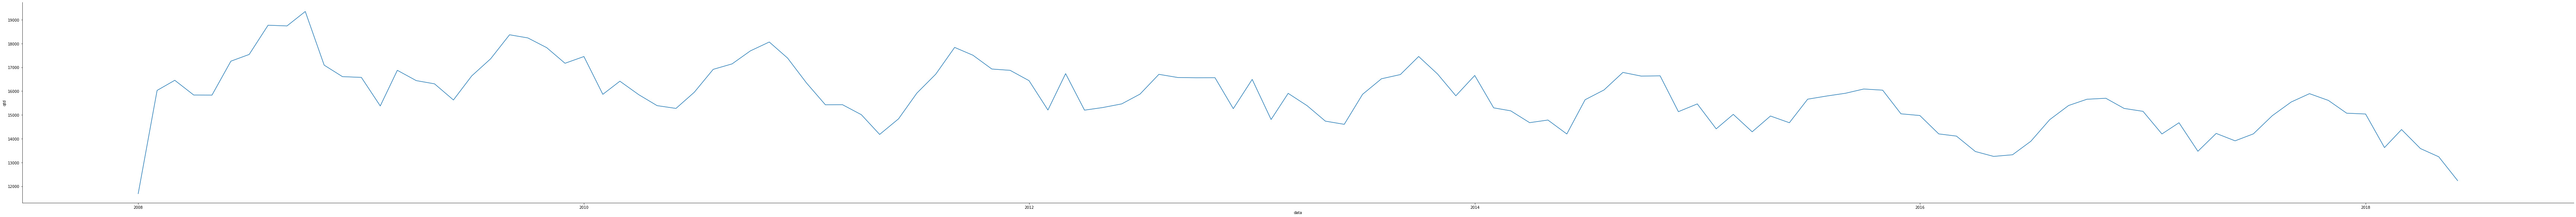

In [61]:
# Célula 2
# Ploting data as graphic
g = sns.relplot(
    x="data", 
    y="qtd", 
    #hue="uf", 
    aspect=12,
    height=8,
    kind="line", 
    data=df_grouped, #df_unpivoted
    legend="full",
)

<AxesSubplot:xlabel='data', ylabel='qtd'>

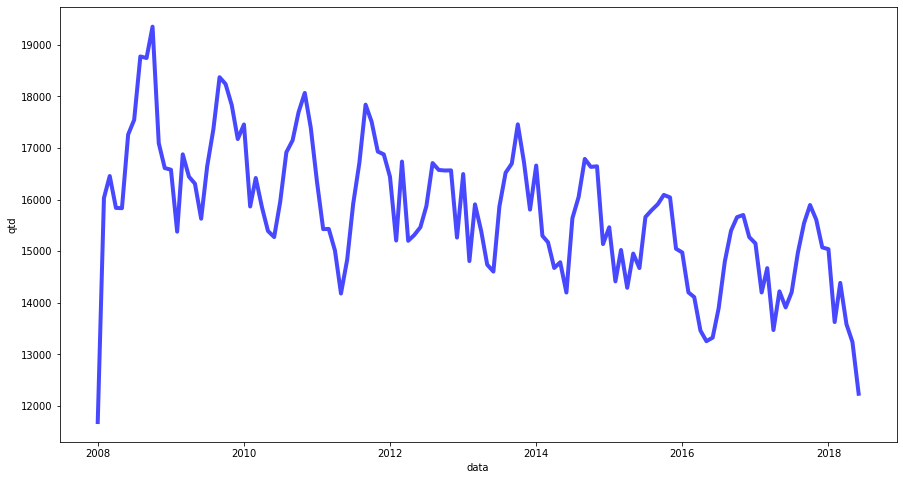

In [62]:
# Célula 3
# Mostrar os gráficos do matplotlib na mesma janela do jupyter notebook
%matplotlib inline
# Define um objeto de figura
fig = plt.figure(figsize=(15,8))
# Adiciona um subplot, pois uma figura pode ter vários plots
ax = fig.add_subplot()
# Desenha um gráfico de linhas com o dataset
# Plota cada linha. lw significa line width
sns.lineplot(x=df_grouped["data"],y=df_grouped["qtd"],data=df_grouped,lw=4,color='#4848FF',ax=ax)
#ax.set(xticks=range(0,126), xticklabels= "teste")


## Mês com mais casos e com maior frequência

Pela execução do procedimento abaixo, veririca-se o mês com mais ocorrência e com maior frequência na mostra é o mês de outubro

In [63]:
# Creating a series ANO, so we can aggregate data by year, so we can get the max("qtde") for every year
df_grouped["ano"] = df_grouped["data"].apply(lambda x: int(x.strftime("%Y")) )
# Creating column mounth, so we can can count the most frequent month in the result (mode)
df_grouped["mes"] = df_grouped["data"].apply(lambda x: int(x.strftime("%m")) )

# Getting the max qtde per year
max_values_per_year = df_grouped.groupby(by=["ano"], as_index=False)["qtd"].max()

# Creating filters by qtde and year to be applied on othe df_grouped and get the months
filter_by_qtd = df_grouped["qtd"].isin(max_values_per_year["qtd"].values) 
filter_by_year = df_grouped["ano"].isin(max_values_per_year["ano"].values) 

# Applying the filters and getting only date realted to te max qtde qtde per year
max_qtede_month = df_grouped[filter_by_qtd & filter_by_year]

months_of_year = {
    1:"Janeiro",
    2:"Fevereiro",
    3:"Março",
    4:"Abril",
    5:"Maio",
    6:"Junho",
    7:"Julho",
    8:"Agosto",
    9:"Setembro",
    10:"Outubro",
    11:"Novembro",
    12:"Dezembro"    
}

# getting the most frequent month
m = months_of_year[max_qtede_month["mes"].mode()[0]]
print(f"Mês mais frequente com maior quantidade: {m}")

Mês mais frequente com maior quantidade: Outubro


## Calculando a média do intervalo dos picos

In [66]:
# List that will store the number of months between one month and the month before
period = []
index_ant = None

# Loop to calculate the number of months in the interval
for index in max_qtede_month["mes"].index:
    if index_ant == None:
        index_ant = index
    else:
        qt_months = 12-max_qtede_month["mes"][index_ant] + max_qtede_month["mes"][index]
        period.append(qt_months)
        index_ant = index

#period           
# Removing the last element, once theyear data is noto cmopleted
period.pop()
# Calculating the mean
print(f"Média do intervalo dos picos: {np.mean(period)}")

Média do intervalo dos picos: 12.0


## Solução Alex -> idxmax

In [65]:
# Creating a series ANO, so we can aggregate data by year, so we can get the max("qtde") for every year
df_grouped["ano"] = df_grouped["data"].apply(lambda x: int(x.strftime("%Y")) )

# Getting the max qtde per year
max_values_per_year = df_grouped.groupby(by=["ano"])["qtd"].idxmax()

# Applying the filters and getting only date realted to te max qtde qtde per year
max_qtede_month = df_grouped.loc[max_values_per_year.values, :]

months_of_year = {
    1:"Janeiro",
    2:"Fevereiro",
    3:"Março",
    4:"Abril",
    5:"Maio",
    6:"Junho",
    7:"Julho",
    8:"Agosto",
    9:"Setembro",
    10:"Outubro",
    11:"Novembro",
    12:"Dezembro"    
}

# getting the most frequent month
most_frequent_month = months_of_year[max_qtede_month["mes"].mode()[0]]
f"Mês mais frequente com maior quantidade: {m}"

'Mês mais frequente com maior quantidade: Outubro'